<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/Flood_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [29]:
import pandas as pd
file_id = '1dUoyUva7NCG9HmaumQkQGLlVhIIMKQ-S'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

# Data Processing

In [30]:
data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
5,KERALA,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,NO
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,YES
7,KERALA,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,NO
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,YES
9,KERALA,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,NO


In [31]:
data.SUBDIVISION.unique()

array(['KERALA', 'KERALA '], dtype=object)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [33]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [34]:
#convert 'FLOODS" column to numeric value (1 for 'YES', O for 'NO')
data['FLOODS'] = data['FLOODS'].map({'YES': 1, 'NO': 0})


In [35]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [45]:
#data cleaning
#remove the 'SUBDIVISION'
data.drop('SUBDIVISION', axis=1, inplace=True)

In [47]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


#Explatory Data Analysis


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


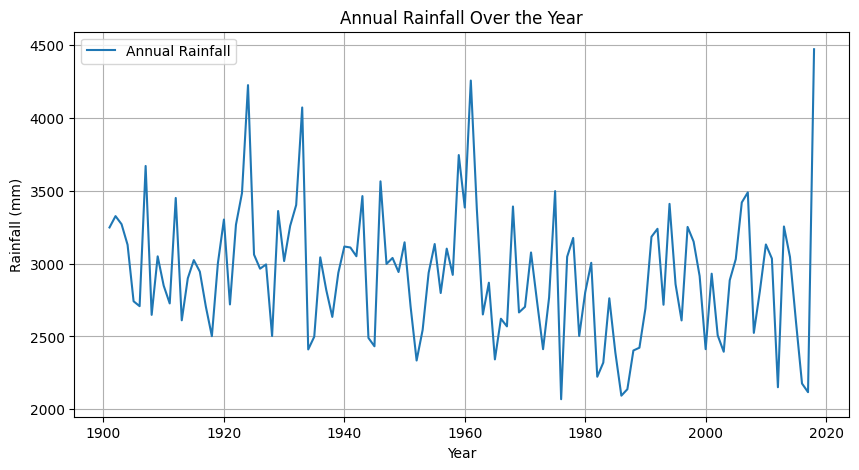

In [49]:
#set the figure size
plt.figure(figsize=(10,5))

#create a line for annual rainfall over the year
plt.plot(data['YEAR'],data[' ANNUAL RAINFALL'], label='Annual Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Annual Rainfall Over the Year')
plt.legend()
plt.grid(True)
plt.show()

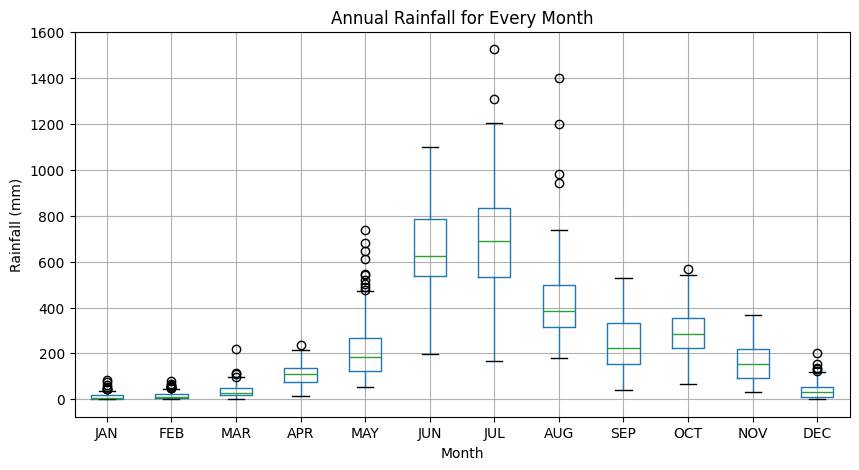

In [50]:
#create bloxplot annual rainfall for every mounth
plt.figure(figsize=(10,5))
data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].boxplot()
plt.title('Annual Rainfall for Every Month')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()

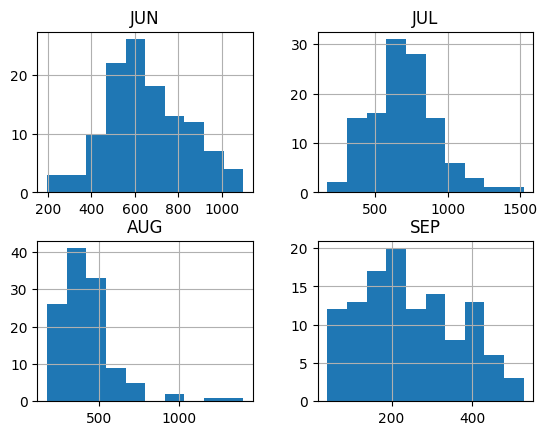

In [51]:
AvgIndex = data[['JUN', 'JUL','AUG', 'SEP']]

AvgIndex.hist()
plt.show()

# Define feature and target

In [52]:
features = data.drop(['FLOODS'], axis=1)
target = data['FLOODS']

# Data Splitting

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Training

In [55]:
#logistic regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [56]:
#model K-Nearest Neighbors(KKN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# MOdel Evaluation

## Logistic Regression

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
logistic_predictions = logistic_model.predict(X_test)



In [58]:
#calculate accuracy
accuracy = accuracy_score(y_test, logistic_predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [59]:
#generate a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

